# Predicting Employee Termination

In [144]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [143]:
# import csv file and create dataframe
df = pd.read_csv('/Users/fabiansiedler/Library/CloudStorage/OneDrive-CBS-CopenhagenBusinessSchool/CBS/Semester 3/AML/Assignments/Assignment 1/MFG10YearTerminationData.csv')



## EDA and Data Pre-Processing

In [145]:
# print number of rows and columns
print(df.shape)

(49653, 18)


In [146]:
# print first 5 rows
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [147]:
# print last 5 rows
df.tail()


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [148]:
# print column names
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [112]:
# print data types
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [155]:
# drop some unimportant columns
df = df.drop(['EmployeeID', 'recorddate_key', 'birthdate_key', 'gender_full'], axis=1)

In [158]:
# print summary statistics
df.describe()


,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,27.297605,2010.612612
std,12.427257,6.325286,13.514134,2.845577
min,19.000000,0.000000,1.000000,2006.000000
25%,31.000000,5.000000,16.000000,2008.000000
50%,42.000000,10.000000,28.000000,2011.000000
75%,53.000000,15.000000,42.000000,2013.000000
max,65.000000,26.000000,46.000000,2015.000000


In [115]:
# check for missing values
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [116]:
# check for duplicates
df.duplicated().sum()

0

In [117]:
# check for unique values
df.nunique()

EmployeeID             6284
recorddate_key          130
birthdate_key          5342
orighiredate_key       4415
terminationdate_key    1055
age                      47
length_of_service        27
city_name                40
department_name          21
job_title                47
store_name               46
gender_short              2
gender_full               2
termreason_desc           4
termtype_desc             3
STATUS_YEAR              10
STATUS                    2
BUSINESS_UNIT             2
dtype: int64

In [118]:
# check values of some columns

df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [119]:
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [120]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

In [121]:
df.store_name.unique()

array([35, 32, 18, 19, 16, 37, 15, 12, 31, 36, 28,  6,  9, 30, 21, 46, 25,
        7,  5,  3,  8, 40, 33, 26, 29, 41, 13, 38, 42,  1,  2, 43, 44, 17,
       45, 22, 39, 20, 11, 14, 34, 23, 27, 10, 24,  4])

In [122]:
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [123]:
df.termtype_desc.unique()

array(['Not Applicable', 'Voluntary', 'Involuntary'], dtype=object)

In [124]:
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

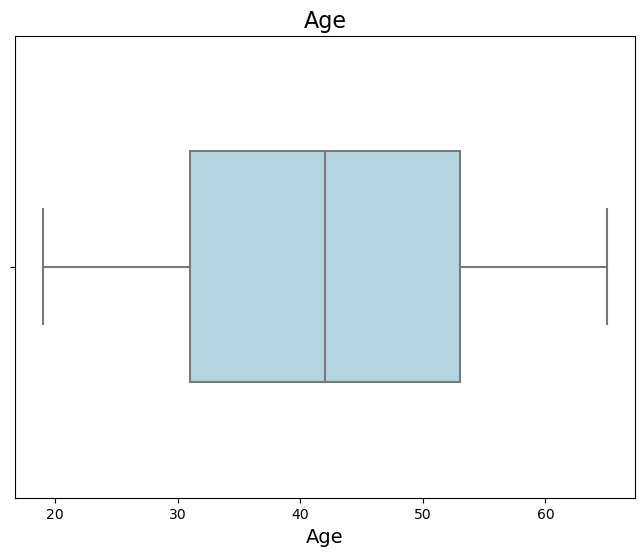

In [125]:
plt.figure(figsize=(8, 6))
sns.set_palette("Set3")
sns.despine()

# Create a boxplot for the age
sns.boxplot(x=df['age'], color='lightblue', width=0.5)
plt.xlabel('Age', fontsize=14)
plt.title('Age', fontsize=16)
plt.show()

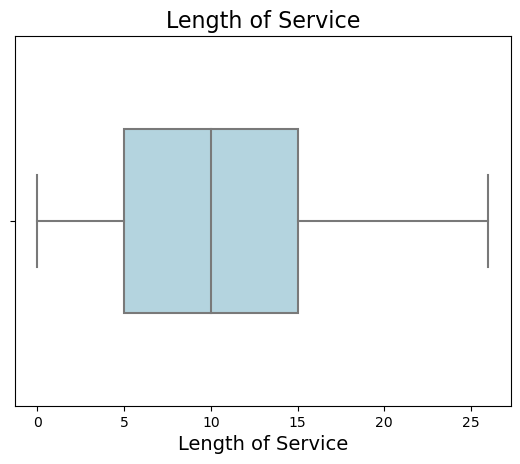

In [126]:
# Create a boxplot for the length of service
sns.boxplot(x=df['length_of_service'], color='lightblue', width=0.5)
plt.xlabel('Length of Service', fontsize=14)
plt.title('Length of Service', fontsize=16)
plt.show()

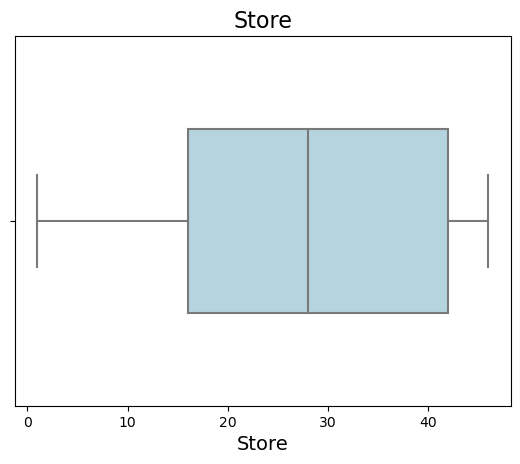

In [127]:
# Create a boxplot for the store name 
sns.boxplot(x=df['store_name'], color='lightblue', width=0.5)
plt.xlabel('Store', fontsize=14)
plt.title('Store', fontsize=16)
plt.show()

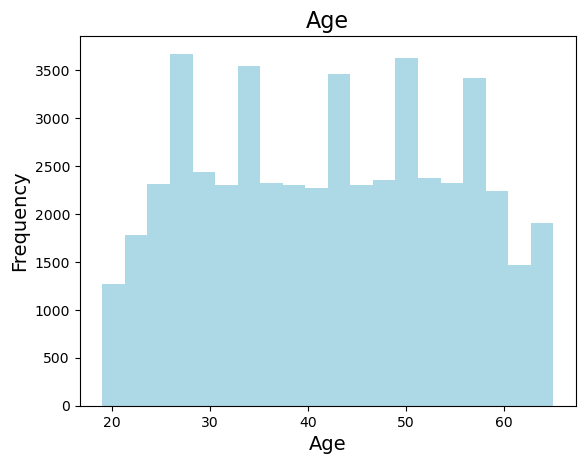

In [128]:
# Use different plots and visualizations to explore the data

# Create a histogram for the age
plt.hist(df['age'], bins=20, color='lightblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age', fontsize=16)
plt.show()


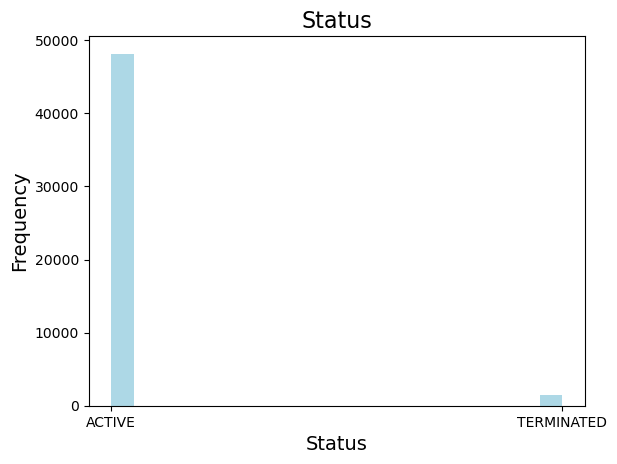

In [159]:
# Create a histogram for the status
plt.hist(df['STATUS'], bins=20, color='lightblue')
plt.xlabel('Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Status', fontsize=16)
plt.show()


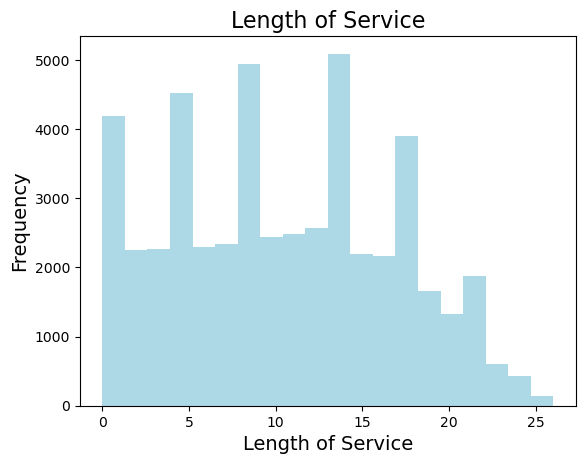

In [129]:
# Create a histogram for the length of service 
plt.hist(df['length_of_service'], bins=20, color='lightblue')
plt.xlabel('Length of Service', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Length of Service', fontsize=16)
plt.show()

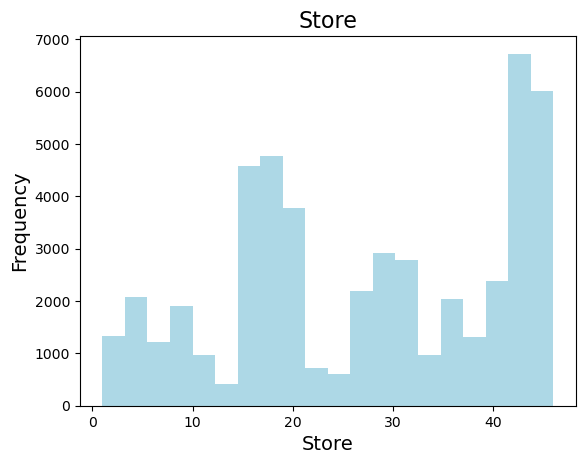

In [149]:
# Create a histogram for the store name
plt.hist(df['store_name'], bins=20, color='lightblue')
plt.xlabel('Store', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Store', fontsize=16)
plt.show()

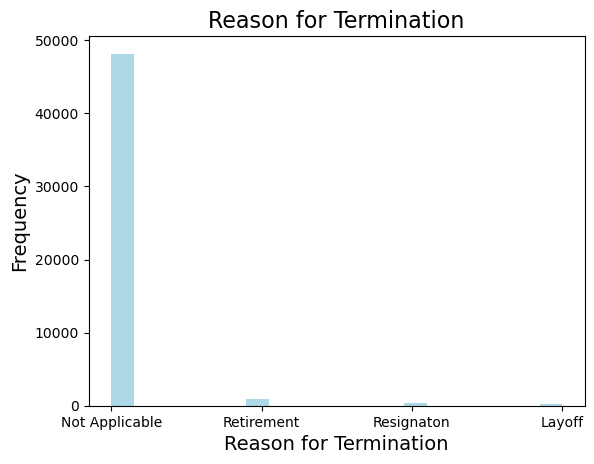

In [131]:
# Create a histogram for the reason for termination
plt.hist(df['termreason_desc'], bins=20, color='lightblue')
plt.xlabel('Reason for Termination', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Reason for Termination', fontsize=16)
plt.show()

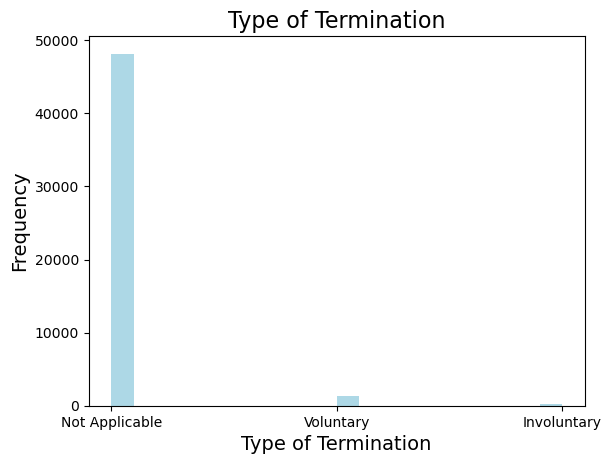

In [132]:
# Create a histogram for the type of termination
plt.hist(df['termtype_desc'], bins=20, color='lightblue')
plt.xlabel('Type of Termination', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Type of Termination', fontsize=16)
plt.show()

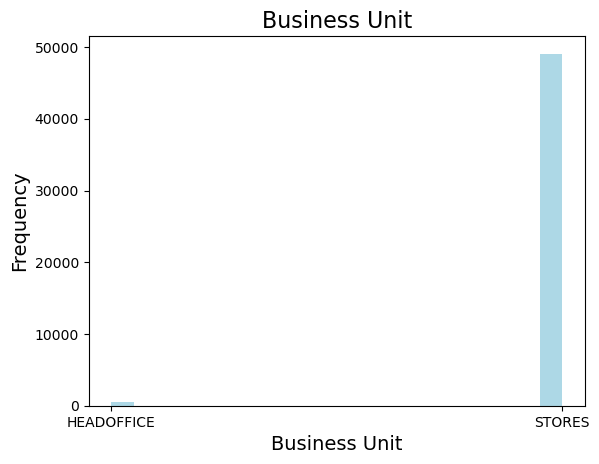

In [133]:
# Create a histogram for the business unit
plt.hist(df['BUSINESS_UNIT'], bins=20, color='lightblue')
plt.xlabel('Business Unit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Business Unit', fontsize=16)
plt.show()

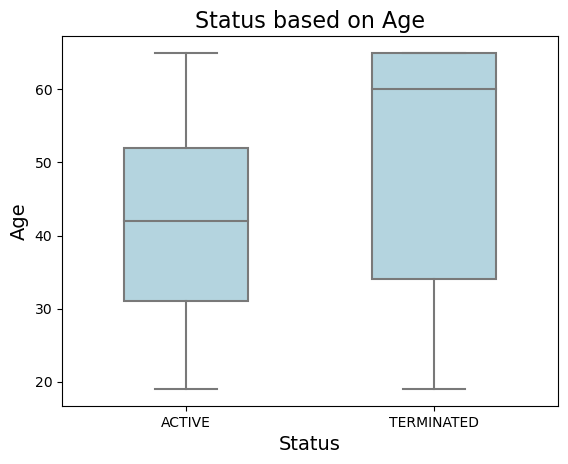

In [161]:
# Show distribution of status based on age
sns.boxplot(x=df['STATUS'], y=df['age'], color='lightblue', width=0.5)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Status based on Age', fontsize=16)
plt.show()


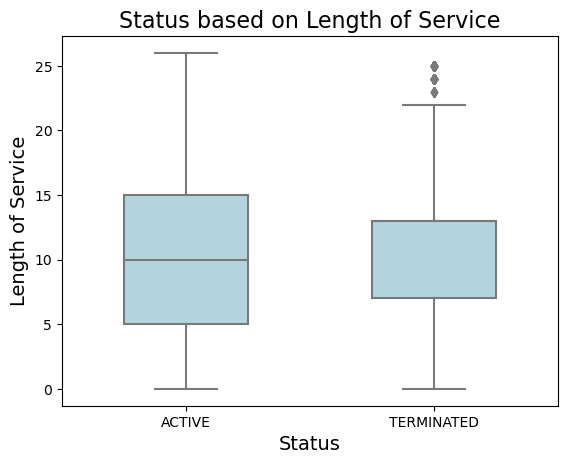

In [162]:
# Show distribution of status based on length of service
sns.boxplot(x=df['STATUS'], y=df['length_of_service'], color='lightblue', width=0.5)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Length of Service', fontsize=14)
plt.title('Status based on Length of Service', fontsize=16)
plt.show()

In [201]:
# Calculate proportion of statuses for each business unit
df.groupby(['job_title', 'STATUS']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Create a dataframe that contains three columns: job_title, STATUS, and count
df1 = df.groupby(['job_title', 'STATUS']).size().reset_index(name='count')

# Create a pivot table that contains the count of statuses for each job title
df2 = df1.pivot(index='job_title', columns='STATUS', values='count')

# Add a total column and calculate the percentage of each status
df2['Total Employees'] = df2['ACTIVE'] + df2['TERMINATED']
df2['% Termination'] = df2['TERMINATED'] / df2['Total Employees'] * 100

# Sort the dataframe by % Termination
df2 = df2.sort_values(by='% Termination', ascending=False)

df2.head(10)




STATUS,ACTIVE,TERMINATED,Total Employees,% Termination
job_title,,,,
"Director, Compensation",3.0,1.0,4.0,25.000000
"Director, Audit",3.0,1.0,4.0,25.000000
Systems Analyst,15.0,5.0,20.0,25.000000
"Director, Investments",3.0,1.0,4.0,25.000000
"Director, Labor Relations",3.0,1.0,4.0,25.000000
"Director, Training",3.0,1.0,4.0,25.000000
Corporate Lawyer,14.0,3.0,17.0,17.647059
Labor Relations Analyst,25.0,5.0,30.0,16.666667
Trainer,22.0,4.0,26.0,15.384615


BUSINESS_UNIT  STATUS    
HEADOFFICE     ACTIVE        88.205128
               TERMINATED    11.794872
STORES         ACTIVE        97.114209
               TERMINATED     2.885791
dtype: float64

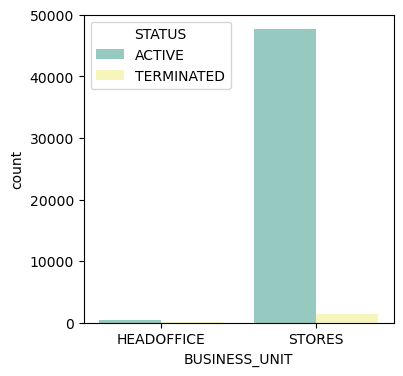

In [175]:
# Show distribution of status based on business unit
plt.figure(figsize=(4,4))
sns.countplot(x="BUSINESS_UNIT", hue="STATUS", data=df)

# Calculate proportion of statuses for each business unit
df.groupby(['BUSINESS_UNIT', 'STATUS']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())


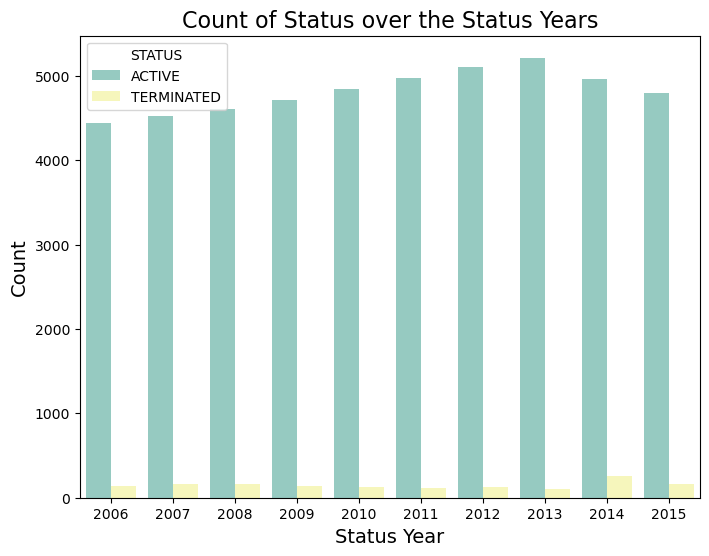

In [204]:
# Development of employee numbers over the years 
plt.figure(figsize=(8, 6))
sns.countplot(x="STATUS_YEAR", hue="STATUS", data=df)
plt.xlabel('Status Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Status over the Status Years', fontsize=16)
plt.show()


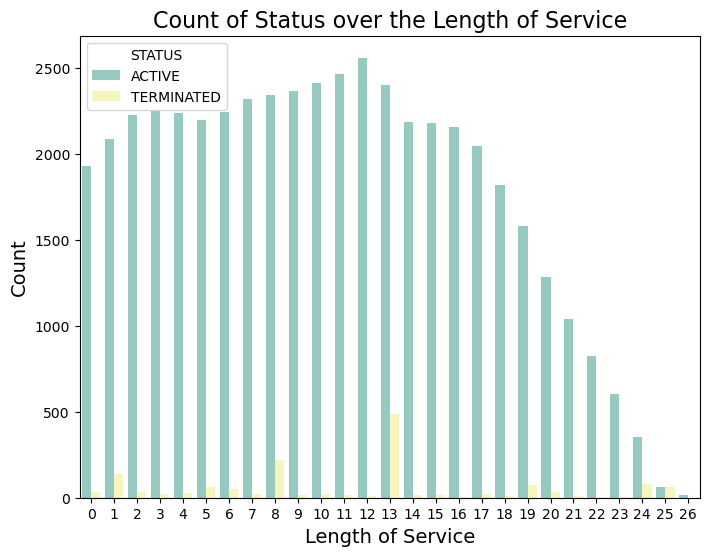

In [206]:
# Countplot of length of service regarding status to see if there is a pattern
plt.figure(figsize=(8, 6))
sns.countplot(x="length_of_service", hue="STATUS", data=df)
plt.xlabel('Length of Service', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Status over the Length of Service', fontsize=16)
plt.show()



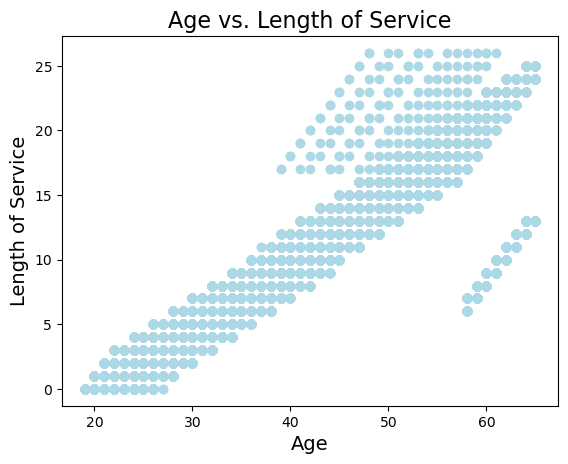

In [134]:
# create a scatterplot for "age" and "length_of_service"
plt.scatter(df['age'], df['length_of_service'], color='lightblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Length of Service', fontsize=14)
plt.title('Age vs. Length of Service', fontsize=16)
plt.show()

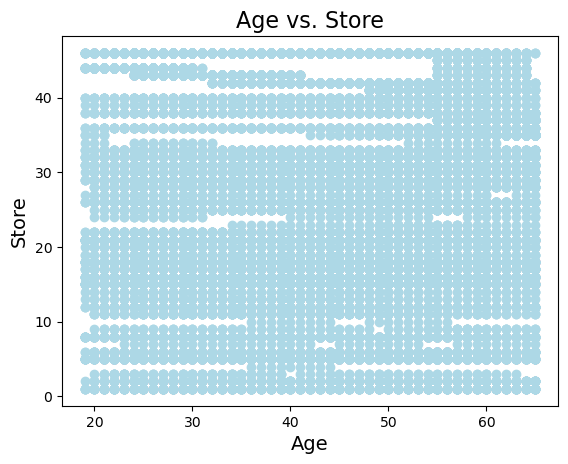

In [135]:
# create a scatterplot for "age" and "store_name"
plt.scatter(df['age'], df['store_name'], color='lightblue')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Store', fontsize=14)
plt.title('Age vs. Store', fontsize=16)
plt.show()

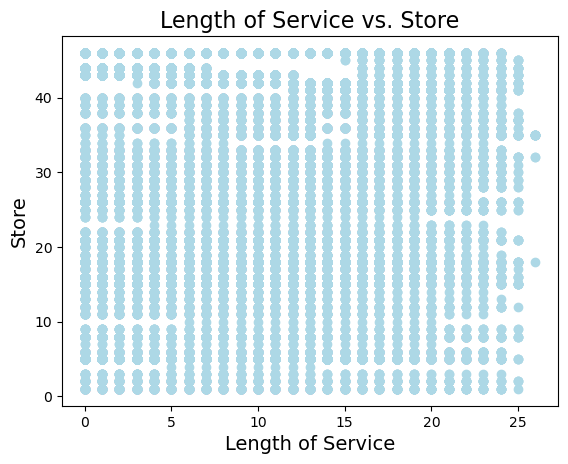

In [136]:
# create a scatterplot for "length_of_service" and "store_name"
plt.scatter(df['length_of_service'], df['store_name'], color='lightblue')
plt.xlabel('Length of Service', fontsize=14)
plt.ylabel('Store', fontsize=14)
plt.title('Length of Service vs. Store', fontsize=16)
plt.show()


## Pattern Recognition

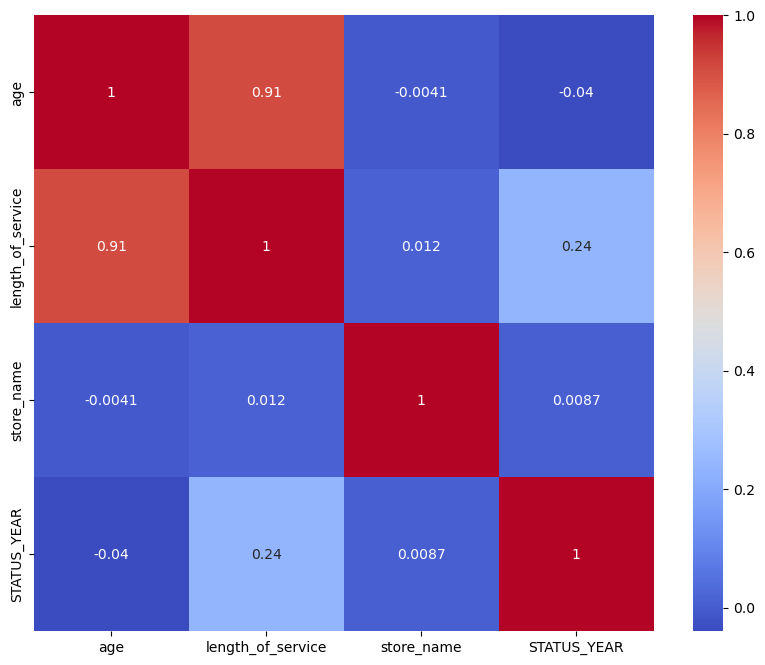

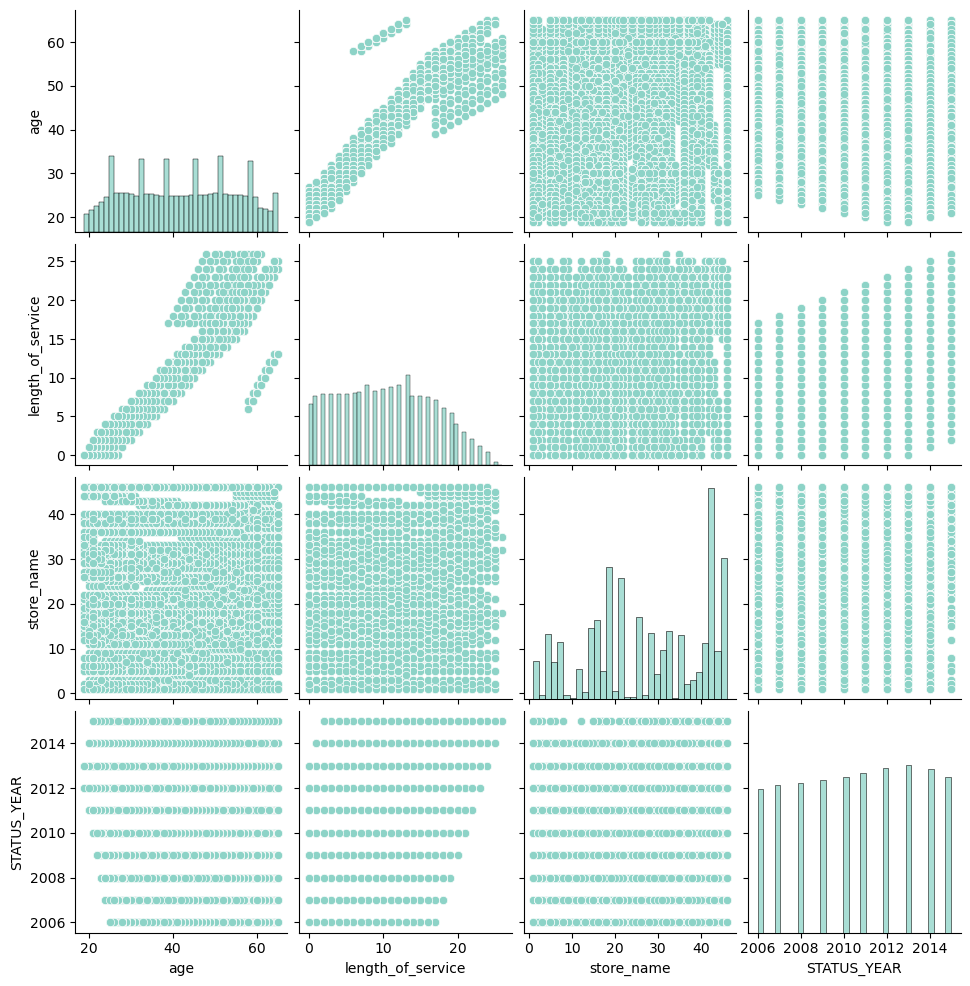

In [208]:
# create correlation matrix
corr = df.corr()
corr

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# create a pairplot
sns.pairplot(df)
plt.show()

## Prediction

In [ ]:
# handle class imbalance 
# encoding categorical variables 
# min-max scaling o.Ä. 
# feature selection
# train test split
# model training
# model evaluation


